In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mumbai = "../AQI CSV Files_raw_data/Mumbai_csv.csv"
mumbai = pd.read_csv(mumbai, delimiter=", ")

C:\Users\a_mcr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
# Check for null values in mumbdai pm25 dataframe
# mumbai.isnull().sum()

# drop 18 rows with null values found in pm25
mumbai_no_nulls = mumbai.dropna(subset=["pm25"])
mumbai_rename = mumbai_no_nulls.rename(columns={"date":"Date","pm25":"PM2.5"})
mumbai_clean = mumbai_rename.drop(columns=["pm10","o3","no2","so2","co"])
mumbai_clean

,Date,PM2.5
0,2020/7/2,30.0
1,2020/7/3,28.0
2,2020/7/4,22.0
3,2020/7/5,20.0
4,2020/7/6,32.0
...,...,...
1404,2016/3/31,99.0
1405,2016/4/1,79.0
1406,2015/12/31,147.0
1407,2016/1/1,208.0


In [5]:
mumbai_clean[["Year","Month","Day"]] = mumbai_clean.loc[:,"Date"].str.split("/", n = 2, expand = True) 
mumbai_clean.drop(columns =["Date"], inplace = True) 
mumbai_clean

,PM2.5,Year,Month,Day
0,30.0,2020,7,2
1,28.0,2020,7,3
2,22.0,2020,7,4
3,20.0,2020,7,5
4,32.0,2020,7,6
...,...,...,...,...
1404,99.0,2016,3,31
1405,79.0,2016,4,1
1406,147.0,2015,12,31
1407,208.0,2016,1,1


In [6]:
mumbai_clean["Year"] = mumbai_clean["Year"].astype(int)
mumbai_clean["Month"] = mumbai_clean["Month"].astype(int)
# mumbai_clean = mumbai_clean[mumbai_clean["Year"]>2016]
mumbai_clean = mumbai_clean[mumbai_clean["Month"]<8]
mumbai_clean

,PM2.5,Year,Month,Day
0,30.0,2020,7,2
1,28.0,2020,7,3
2,22.0,2020,7,4
3,20.0,2020,7,5
4,32.0,2020,7,6
...,...,...,...,...
1403,109.0,2016,3,30
1404,99.0,2016,3,31
1405,79.0,2016,4,1
1407,208.0,2016,1,1


In [7]:
mumbai_clean = mumbai_clean[["Year", "Month", "Day", "PM2.5"]]
mumbai_sorted = mumbai_clean.sort_values(by=["Year","Month"], ascending=False)
mumbai_sorted

,Year,Month,Day,PM2.5
0,2020,7,2,30.0
1,2020,7,3,28.0
2,2020,7,4,22.0
3,2020,7,5,20.0
4,2020,7,6,32.0
...,...,...,...,...
1342,2016,1,29,185.0
1343,2016,1,30,176.0
1344,2016,1,31,163.0
1407,2016,1,1,208.0


In [8]:
AQI = []
for value in mumbai_sorted["PM2.5"]:
    if value >= 0 and value <= 12:
        AQI.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI.append("invalid")
AQI = [round(i,1) for i in AQI]
mumbai_sorted["AQI"] = AQI
mumbai_sorted

,Year,Month,Day,PM2.5,AQI
0,2020,7,2,30.0,88.6
1,2020,7,3,28.0,84.4
2,2020,7,4,22.0,71.8
3,2020,7,5,20.0,67.6
4,2020,7,6,32.0,92.8
...,...,...,...,...,...
1342,2016,1,29,185.0,235.2
1343,2016,1,30,176.0,226.3
1344,2016,1,31,163.0,213.4
1407,2016,1,1,208.0,258.0


In [9]:
# Create bins, cast min and max AQI for preview of bin range
# mumbai_sorted["AQI"].describe()

bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups", "Unhealthy","Very Unhealthy","Hazardous"]

# place the data series into a new column inside of the DataFrame
mumbai_sorted["Levels of Concern"]=pd.cut(mumbai_sorted["AQI"], bins, labels=quality, include_lowest=True)
mumbai_bin = mumbai_sorted
mumbai_bin

,Year,Month,Day,PM2.5,AQI,Levels of Concern
0,2020,7,2,30.0,88.6,Moderate
1,2020,7,3,28.0,84.4,Moderate
2,2020,7,4,22.0,71.8,Moderate
3,2020,7,5,20.0,67.6,Moderate
4,2020,7,6,32.0,92.8,Moderate
...,...,...,...,...,...,...
1342,2016,1,29,185.0,235.2,Very Unhealthy
1343,2016,1,30,176.0,226.3,Very Unhealthy
1344,2016,1,31,163.0,213.4,Very Unhealthy
1407,2016,1,1,208.0,258.0,Very Unhealthy


In [38]:
# Create bins for Daily AQI Color

bins = [0,50,100,150,200,300,500]
colors = ["Green","Yellow","Orange", "Red","Purple","Maroon"]

# place the data series into a new column inside of the DataFrame
mumbai_bin["Daily AQI Color"]=pd.cut(mumbai_bin["AQI"], bins, labels=colors, include_lowest=True)
mumbai_bins = mumbai_bin
mumbai_bins

,Year,Month,Day,PM2.5,AQI,Levels of Concern,Daily AQI Color
0,2020,7,2,30.0,88.6,Moderate,Yellow
1,2020,7,3,28.0,84.4,Moderate,Yellow
2,2020,7,4,22.0,71.8,Moderate,Yellow
3,2020,7,5,20.0,67.6,Moderate,Yellow
4,2020,7,6,32.0,92.8,Moderate,Yellow
...,...,...,...,...,...,...,...
1342,2016,1,29,185.0,235.2,Very Unhealthy,Purple
1343,2016,1,30,176.0,226.3,Very Unhealthy,Purple
1344,2016,1,31,163.0,213.4,Very Unhealthy,Purple
1407,2016,1,1,208.0,258.0,Very Unhealthy,Purple


In [16]:
## Review number of days availble for mean AQI to view how mean could be affected
## 2016 month of June has only 22 observations available (8 days not available)
mumbai_bins.groupby(["Year","Month"]).count()

Day  PM2.5  AQI  Levels of Concern  Daily AQI Color
Year Month                                                     
2016 1       29     29   29                 29               29
     2       29     29   29                 29               29
     3       31     31   31                 31               31
     4       30     30   30                 30               30
     5       31     31   31                 31               31
     6       22     22   22                 22               22
     7       30     30   30                 30               30
2017 1       30     30   30                 30               30
     2       28     28   28                 28               28
     3       31     31   31                 31               31
     4       30     30   30                 30               30
     5       31     31   31                 31               31
     6       30     30   30                 30               30
     7       30     30   30                 30               30
2018 1       30     30   30                 30               30
     2       28     28   28                 28               28
     3       31     31   31                 31               31
     4       20     20   20                 20               20
2019 1       30     30   30                 30               30
     2       28     28   28                 28               28
     3       31     31   31                 31               31
     4       30     30   30                 30               30
     5       31     31   31                 31               31
     6       30     30   30                 30               30
     7       27     27   27                 27               27
2020 1       30     30   30                 30               30
     2       29     29   29                 29               29
     3       29     29   29                 29               29
     4       30     30   30                 30               30
     5       31     31   31                 31               31
     6       26     26   26                 26               26
     7       26     26   26                 26               26

In [41]:
mumbai_agg = mumbai_bins.groupby(["Year","Month"]).agg({"AQI":["mean","min","max","sem"]})
mumbai_months = mumbai_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
mumbai_months

AQI                        
                  mean    min    max       sem
Year Month                                    
2016 Jan    209.006897  181.7  258.0  3.749558
     Feb    182.424138  160.0  206.5  2.013181
     Mar    176.635484  151.8  214.4  2.412876
     Apr    163.660000  146.6  175.0  1.185270
     May    163.148387  136.7  196.1  1.868648
     June   161.340909  149.0  172.4  1.251815
     Jul    166.826667  121.9  371.9  7.819852
2017 Jan    209.476667  181.2  261.9  3.141245
     Feb    196.835714  165.2  223.3  3.230359
     Mar    190.974194  158.5  346.1  5.892268
     Apr    176.703333  159.0  218.3  2.688906
     May    163.935484  153.3  177.0  1.177902
     June   152.756667  126.9  175.5  2.290569
     Jul    150.156667   92.8  233.2  5.231238
2018 Jan    204.516667  177.6  234.2  2.817895
     Feb    213.042857  154.9  372.8  9.932849
     Mar    191.638710  165.2  304.5  4.845860
     Apr    173.385000  160.5  194.1  1.884581
2019 Jan    199.893333  163.6  226.3  2.844001
     Feb    191.182143  155.4  224.3  3.291287
     Mar    167.961290  151.8  193.6  1.950967
     Apr    156.666667  134.2  171.9  1.199093
     May    145.383871  117.0  159.0  2.085527
     June   135.490000  109.6  152.8  2.429873
     Jul    139.711111  104.7  337.2  8.173884
2020 Jan    183.640000  152.8  199.7  2.479380
     Feb    182.965517  161.1  202.5  1.583935
     Mar    160.355172  131.8  188.9  2.192124
     Apr    153.756667  126.9  182.2  2.330096
     May    176.135484   80.2  193.6  3.480327
     June   110.830769   76.0  149.0  3.375344
     Jul     93.665385   67.6  156.4  3.445867

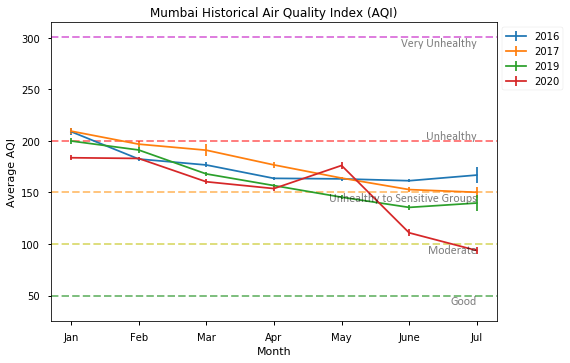

In [59]:
plt.style.use('seaborn-notebook')
mumbai_months["AQI"]["mean"].loc[2016].plot.line(label=2016, yerr=mumbai_months["AQI"]["sem"].loc[2016])
mumbai_months["AQI"]["mean"].loc[2017].plot.line(label=2017, yerr=mumbai_months["AQI"]["sem"].loc[2017])
mumbai_months["AQI"]["mean"].loc[2019].plot.line(label=2019, yerr=mumbai_months["AQI"]["sem"].loc[2019])
mumbai_months["AQI"]["mean"].loc[2020].plot.line(label=2020, yerr=mumbai_months["AQI"]["sem"].loc[2020])

# plt.text(6,399,'Hazardous', ha='right', va='top', fontsize=12, family='calibri')
plt.axhline(y=301,color='m', alpha=.5, linestyle='--', lw=2)
plt.text(6,301,'Very Unhealthy', ha='right', va='top', fontsize=12, family='calibri', alpha=.5)
plt.axhline(y=200,color='r', alpha=.5, linestyle='--', lw=2)
plt.text(6,200,'Unhealthy', ha='right', va='bottom', fontsize=12,family='calibri',alpha=.5)
plt.axhline(y=150,color='darkorange', alpha=.5, linestyle='--', lw=2)
plt.text(6,150,'Unhealthy to Sensitive Groups', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
plt.axhline(y=100,color='y', alpha=.5, linestyle='--', lw=2)
plt.text(6,100,'Moderate', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
plt.text(6,50,'Good', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)

plt.ylim(25,315)
plt.title("Mumbai Historical Air Quality Index (AQI)")
plt.ylabel("Average AQI")
plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left')
plt.savefig("../Saved_figures_alvaro/mumbai.png")
plt.show()

In [13]:
# mumbai_agg["AQI"]["mean"].loc[2017]

In [14]:
mumbai_months_df = mumbai_bins.groupby(["Year","Month"]).mean()
mumbai_months_df.drop(columns =["PM2.5"], inplace = True) 
mumbai_months_df["AQI"] = round(mumbai_months_df["AQI"])
mumbai_ave = mumbai_months_df

In [15]:
mumbai_ave.to_csv("../Saved_csv_files_alvaro/mumbai_ave_aqi.csv")